<a href="https://colab.research.google.com/github/reyfdz/Proyecto-final/blob/main/hospitales_lr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import modules we are going to use

In [ ]:
import pandas as pd
import seaborn as sns
import folium
from folium.plugins import HeatMap
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy import stats



make data frame for first csv

In [ ]:
df_hospitls = pd.read_csv("Hospital_General_Information.csv")



make a second data frame and show the columns

In [ ]:
df_locations =  pd.read_csv("hospital_locations.csv")
df_locations.columns

Index(['index', 'X', 'Y', 'OBJECTID', 'ID', 'NAME', 'ADDRESS', 'CITY', 'STATE',
       'ZIP', 'ZIP4', 'TELEPHONE', 'TYPE', 'STATUS', 'POPULATION', 'COUNTY',
       'COUNTYFIPS', 'COUNTRY', 'LATITUDE', 'LONGITUDE', 'NAICS_CODE',
       'NAICS_DESC', 'SOURCE', 'SOURCEDATE', 'VAL_METHOD', 'VAL_DATE',
       'WEBSITE', 'STATE_ID', 'ALT_NAME', 'ST_FIPS', 'OWNER', 'TTL_STAFF',
       'BEDS', 'TRAUMA', 'HELIPAD'],
      dtype='object')

Make a data frame states with the largest amount of hospitals

In [ ]:
plot_1 = pd.DataFrame(df_locations.groupby(by='STATE').index.count())
plot_1= plot_1.sort_values("index", ascending=False)
plot_1

state_head = plot_1.head(10)
state_tail = plot_1.tail(10)

Plot graph

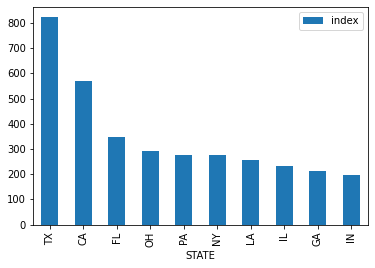

In [ ]:
state_head.plot(kind='bar')

States with the smallest amount of hospitals

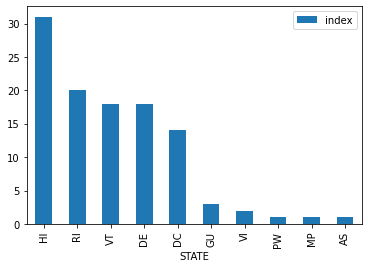

In [ ]:
state_tail.plot(kind='bar')

Make new data frame counting hospitals with heliports

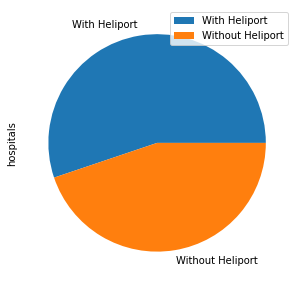

In [ ]:
df_heli_y = df_locations[df_locations["HELIPAD"] ==  "Y"].OBJECTID.count()
df_heli_y

df_heli_n = df_locations[df_locations["HELIPAD"] ==  "N"].OBJECTID.count()
df_heli_n

df = pd.DataFrame([[df_heli_y], [df_heli_n]], columns=["hospitals"], index=['With Heliport', 'Without Heliport'])
df
df.plot.pie(y='hospitals', figsize=(5, 5))
#plot_2 = pd.DataFrame(df_locations.groupby(by='HELIPAD' == "Y").count())
#plot_2= plot_2.sort_values("id", ascending=False).head(20)
#plot_2

Map of Hospitals with a Heliport

In [ ]:
df_heli = df_locations[df_locations["HELIPAD"] ==  "Y"]
df_heli = HeatMap(set(zip(df_heli.LATITUDE.values,df_heli.LONGITUDE.values)))
heli_map = folium.Map(location=[37,-99])
heli_map.add_child(df_heli)
heli_map

Count how many hositals of each type there are and merge hospitals types with a small amount to make the chart more readable

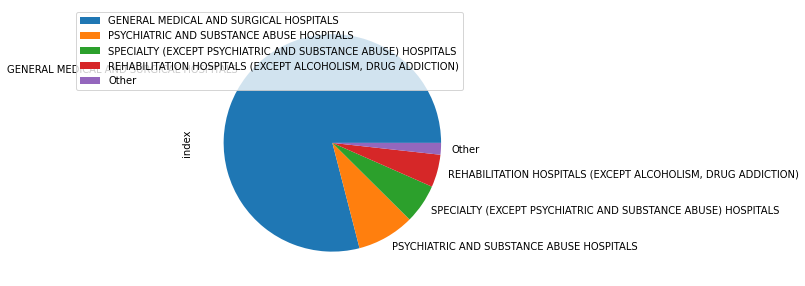

In [ ]:
plot_1 = pd.DataFrame(df_locations.groupby(by='NAICS_DESC').index.count())
plot_1= plot_1.sort_values("index", ascending=False)
other = plot_1.iloc[5:]
plot_1 = plot_1.iloc[0:4]

df2 = pd.DataFrame([[sum(other['index'])]], columns=['index'], index=['Other'])
df2
plot_1 = plot_1.append(df2)

#other = sum .value

plot_1.plot.pie(y='index', figsize=(5, 5))


In [ ]:
other

,index
NAICS_DESC,
"EXTENDED CARE HOSPITALS (EXCEPT MENTAL, SUBSTANCE ABUSE)",30
"CHILDREN'S HOSPITALS, SPECIALTY (EXCEPT PSYCHIATRIC, SUBSTANCE ABUSE)",20
"HOSPITALS, PSYCHIATRIC (EXCEPT CONVALESCENT)",16
"HOSPITALS, ADDICTION",12
"HOSPITALS, SUBSTANCE ABUSE",12
ORTHOPEDIC HOSPITALS,12
CHRONIC DISEASE HOSPITALS,9
"CHILDREN'S HOSPITALS, PSYCHIATRIC OR SUBSTANCE ABUSE",8
"HOSPITALS, SPECIALTY (EXCEPT PSYCHIATRIC, SUBSTANCE ABUSE)",5


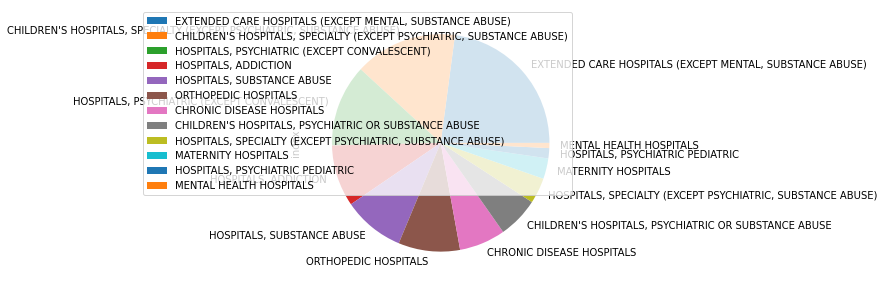

In [ ]:
other.plot.pie(y='index', figsize=(5, 5))

Make a pie chart showing hospital raings

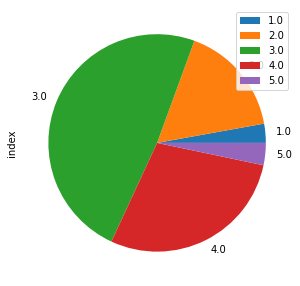

In [ ]:
df_rating = df_hospitls.dropna(subset=['Hospital overall rating'])
df_rating =  pd.DataFrame(df_rating.groupby(by='Hospital overall rating').index.sum())
df_rating.plot.pie(y='index', figsize=(5, 5))

Hospitals Ranking 5.0

In [ ]:
df_rating_5 = df_hospitls[df_hospitls["Hospital overall rating"] ==  5.0]
df_rating_5 =list(df_rating_5["Hospital Name"])
df_plot = df_locations[df_locations.NAME.isin(df_rating_5)]

df_plot = HeatMap(set(zip(df_plot.LATITUDE.values,df_plot.LONGITUDE.values)))
map_5 = folium.Map(location=[37,-99])
map_5.add_child(df_plot)
map_5

Hospitals Ranking 1.0

In [ ]:
df_rating_1 = df_hospitls[df_hospitls["Hospital overall rating"] ==  1.0]
df_rating_1 =list(df_rating_1["Hospital Name"])
df_plot = df_locations[df_locations.NAME.isin(df_rating_1)]

df_plot = HeatMap(set(zip(df_plot.LATITUDE.values,df_plot.LONGITUDE.values)))
map_1 = folium.Map(location=[37,-99])
map_1.add_child(df_plot)
map_1

In [ ]:
df_hospitls['Mortality national comparison'].unique()

array(['Below the National average', 'Same as the National average',
       'Not Available', 'Above the National average'], dtype=object)

Hospitals Average Death Rate

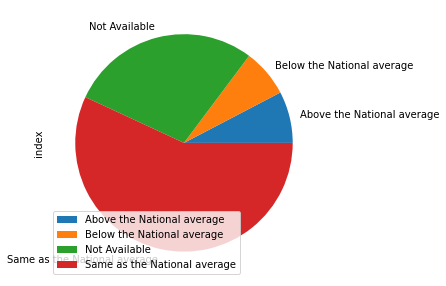

In [ ]:
df_hospitls['Mortality national comparison'].unique()
df_mortality=  pd.DataFrame(df_hospitls.groupby(by='Mortality national comparison').index.sum())
df_mortality.plot.pie(y='index', figsize=(5, 5))

Above National Death Rate Hospitals

In [ ]:
df_high_death = df_hospitls[df_hospitls["Mortality national comparison"] ==  "Above the National average"]
df_high_death =list(df_high_death["Hospital Name"])
df_plot = df_locations[df_locations.NAME.isin(df_high_death)]

df_plot = HeatMap(set(zip(df_plot.LATITUDE.values,df_plot.LONGITUDE.values)))
map_death = folium.Map(location=[37,-99])
map_death.add_child(df_plot)
map_death

Below Average death rate hospitals

In [ ]:
df_low_death = df_hospitls[df_hospitls["Mortality national comparison"] ==  "Below the National average"]
map_low_death =list(df_low_death["Hospital Name"])
df_plot = df_locations[df_locations.NAME.isin(map_low_death)]

df_plot = HeatMap(set(zip(df_plot.LATITUDE.values,df_plot.LONGITUDE.values)))
map_low_death = folium.Map(location=[37,-99])
map_low_death.add_child(df_plot)
map_low_death

In [ ]:
#%matplotlib inline
import matplotlib.pyplot as plt

make  a new data frame counting how many hospitlals with helipads per state and how many hospitals with a lower than average death rate per state


In [ ]:
df_heli = df_locations[df_locations["HELIPAD"] ==  "Y"]
df_x = pd.DataFrame(df_heli.groupby(by='STATE').index.count())
df_x= df_x.sort_values("index", ascending=False)
df_x = df_x.rename(columns={"index": "x"})

df_y =  pd.DataFrame(df_low_death.groupby(by='State').index.count())
df_y= df_y.sort_values("index", ascending=False)
df_y = df_y.rename(columns={"index": "y"})
#df_x = df_x["index"]
#df_y = df_y["index"]




joining dataframes

In [ ]:
df_xy = pd.concat([df_x,df_y], axis=1)

df_xy

,x,y
TX,423,22.0
FL,195,21.0
CA,194,25.0
OH,165,5.0
IL,150,13.0
PA,137,11.0
TN,123,19.0
MO,123,12.0
WI,118,8.0
IA,118,6.0


clearing null values to prepare for linear regression

linear regression using seaborn

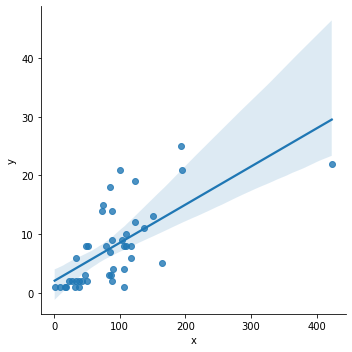

In [ ]:
# drop nan

df1 = df_xy[df_xy["y"].notnull()]
df1

sns.lmplot(x = 'x', y = 'y', data = df1)

linear regression using stats

In [ ]:


x = df1["x"]
y = df1["y"]


In [ ]:
barx = np.mean(x) 
bary = np.mean(y)
print(barx, bary) 

89.11363636363636 7.795454545454546


In [ ]:
varx = np.var(x, ddof=1) 
covxy= np.cov(x,y, ddof=1)
varx, covxy 

(4834.707716701902, array([[4834.7077167 ,  314.53541226],
        [ 314.53541226,   45.09672304]]))

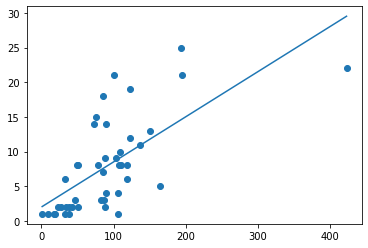

In [ ]:
slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()